
## Why ODC for DEA?

-  Shift in paradigm from scene based analysis to pixel based.

-  A simple, standard, and extensible way to interact with and perform analysis on data.

-  Allow users to define exactly in what state data is to be delivered in terms of projection, resolution, bands and datasets.

-  Easily create subsets or derivative products that are managed and tracked by the Data Cube 

-  Provide a base set of functions and tools that make analysis more simple!


### Let's get right into it by loading a cube.



In [98]:
%%time
%matplotlib notebook
import datacube

dc = datacube.Datacube(app='load-data-example')

#Let's request a datacube!!
#By default, the x and y arguments accept queries in a geographical co-ordinate system WGS84, 
#identified by the EPSG code 4326, which is the same as within Google Earth.

data_cube = dc.load(product='s2a_nrt_granule', 
               x=(146.30, 146.40), y=(-43.30,-43.20),
               time=('2018-09-01', '2018-10-01'),
               resolution = (-10,10),
               output_crs='epsg:3577',
               measurements=('nbar_red','nbar_green','nbar_blue','nbar_nir_1','fmask')
               )




CPU times: user 4.41 s, sys: 0 ns, total: 4.41 s
Wall time: 14.6 s


In [90]:
print (data_cube)

<xarray.Dataset>
Dimensions:     (time: 11, x: 956, y: 1163)
Coordinates:
  * time        (time) datetime64[ns] 2018-08-08T00:02:40.458000 ...
  * y           (y) float64 -4.788e+06 -4.788e+06 -4.788e+06 -4.788e+06 ...
  * x           (x) float64 1.197e+06 1.197e+06 1.197e+06 1.197e+06 ...
Data variables:
    nbar_red    (time, y, x) int16 3871 3757 3687 3610 3649 3719 3752 3679 ...
    nbar_green  (time, y, x) int16 3614 3668 3643 3663 3640 3605 3634 3710 ...
    nbar_blue   (time, y, x) int16 3901 3724 3739 3766 3781 3869 4073 4212 ...
    nbar_nir_1  (time, y, x) int16 3850 3913 3882 3819 3771 3823 3941 4087 ...
    fmask       (time, y, x) uint8 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
Attributes:
    crs:      epsg:3577


## Let's explore what a data cube is...?

In the context of earth observation a data cube is a multi-dimensional array that will consistantly contain the dimensions of time and a spatial grid. Along these dimensions any number of measurements can be associated to these grids and will represent the measurement taken at a specific time and space. 

<img src="images/Data_Cube.png">

The ODC uses the XArray library http://xarray.pydata.org/en/stable/, the key to building effective ODC algorithms is to master the use of the xarray. Please click on the documention to find out more otherwise a number of examples are provided below.

They're also python libraries such as Dask http://dask.pydata.org/en/latest/ that can scale up computation of XArray to supercomputing, and cloud solutions. They're many other project utilising XArray and it becoming a standard for multi-dimenional data analysis.


In [91]:
%matplotlib notebook
#Pixel Drill by index through time
pixel_drill_index = data_cube.isel(x=[500], y=[1000])
print (pixel_drill_index)
print ('----------------------------------------------')

#Pixel Drill by coordinates through time.
pixel_drill_coordinates = data_cube.sel(x = [-4788000], y = [1197000], method = 'nearest')
print (pixel_drill_coordinates)
print ('----------------------------------------------')

#Pixel Drill by coordinates through time.
pixel_slice_index = data_cube.isel(x = slice(200,300), y = slice(200,300), time = 2)
print (pixel_slice_index)



<xarray.Dataset>
Dimensions:     (time: 11, x: 1, y: 1)
Coordinates:
  * time        (time) datetime64[ns] 2018-08-08T00:02:40.458000 ...
  * y           (y) float64 -4.798e+06
  * x           (x) float64 1.202e+06
Data variables:
    nbar_red    (time, y, x) int16 4315 3285 8889 4647 2909 5984 7489 1377 ...
    nbar_green  (time, y, x) int16 4064 3205 8484 4411 2817 5907 7074 1643 ...
    nbar_blue   (time, y, x) int16 3981 3231 8609 4459 2839 6001 7257 1890 ...
    nbar_nir_1  (time, y, x) int16 4156 3715 9342 4721 3649 6055 8186 1837 ...
    fmask       (time, y, x) uint8 2 2 2 2 2 2 2 2 2 1 2
Attributes:
    crs:      epsg:3577
----------------------------------------------
<xarray.Dataset>
Dimensions:     (time: 11, x: 1, y: 1)
Coordinates:
  * time        (time) datetime64[ns] 2018-08-08T00:02:40.458000 ...
  * y           (y) float64 -4.788e+06
  * x           (x) float64 1.197e+06
Data variables:
    nbar_red    (time, y, x) int16 3871 3880 5577 1706 1413 7092 2440 3015 ...
   

## Querying a data cube.

Our datacube can now be sliced, trimmed or querried with masks, you can basically sculpt any object out of the cube pixels.

<img src="images/pixel_drill.png">
<img src="images/line_drill.png">


<IPython.core.display.Javascript object>


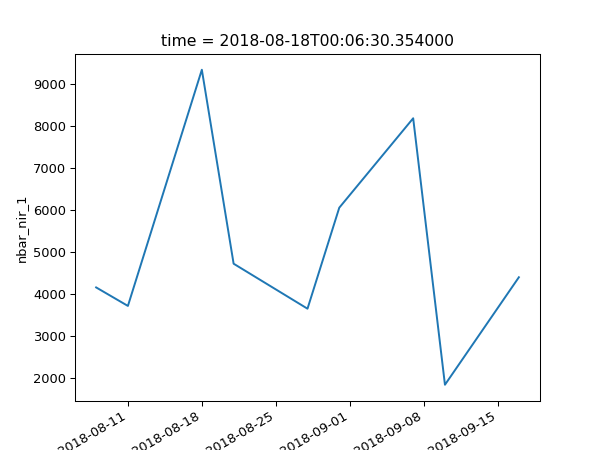

In [57]:
pixel_drill_index.nbar_nir_1.plot()
#pixel_drill_index.nbar_red.plot()
#pixel_drill_index.nbar_green.plot()
#pixel_drill_index.nbar_blue.plot()

<xarray.Dataset>
Dimensions:     (month: 2)
Coordinates:
  * month       (month) int64 8 9
Data variables:
    nbar_red    (month) float64 3.923e+03 4.382e+03
    nbar_green  (month) float64 3.815e+03 4.296e+03
    nbar_blue   (month) float64 3.973e+03 4.375e+03
    nbar_nir_1  (month) float64 4.41e+03 5.125e+03
---------------------------------
<xarray.Dataset>
Dimensions:     (x: 100)
Coordinates:
    time        datetime64[ns] 2018-08-18T00:06:30.354000
  * x           (x) float64 1.199e+06 1.199e+06 1.199e+06 1.199e+06 ...
Data variables:
    nbar_red    (x) float64 9.6e+03 9.581e+03 9.564e+03 9.559e+03 9.558e+03 ...
    nbar_green  (x) float64 8.971e+03 8.962e+03 8.943e+03 8.925e+03 ...
    nbar_blue   (x) float64 8.869e+03 8.864e+03 8.864e+03 8.844e+03 ...
    nbar_nir_1  (x) float64 1e+04 1e+04 9.999e+03 9.999e+03 1e+04 1e+04 ...


<IPython.core.display.Javascript object>


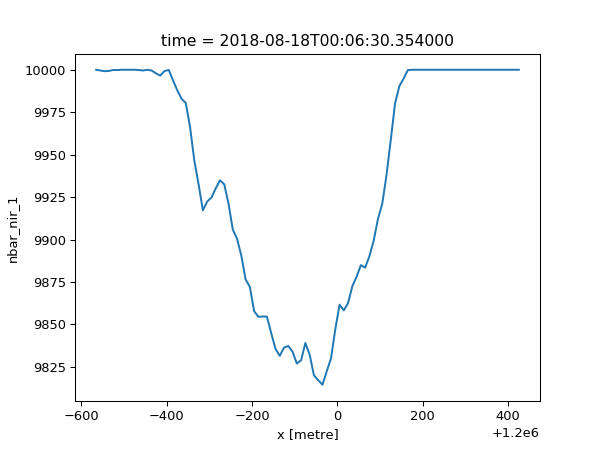

In [59]:
%matplotlib notebook
#Operations on cubes.
monthly_means = pixel_drill_coordinates.groupby('time.month').mean()
print (monthly_means)
print ('---------------------------------')

y_cross_sections = pixel_slice_index.groupby('x').mean()
print (y_cross_sections)
y_cross_sections.nbar_nir_1.plot()

## Masking using DEA provided meta-data.

Next we'll explore sentinel 2 fmask, each pixel in the QA bands of products contain integers or bit packed combinations that represent surface, atmospheric, and sensor conditions that can affect the overall usefulness of a given pixel.

Used effectively, these masks improve the integrity of science investigations by indicating which pixels might be affected by instrument artifacts or subject to cloud contamination. The ODC has in built methods that transform the metadata of a specific product to a libary of masking templates. For example, you are able to build a cloud mask directly from the ODC library.

In [63]:
from datacube.storage import masking  # Import masking capabilities
print (masking.describe_variable_flags(data_cube)) #Describe the masks available


                           bits  \
fmask  [0, 1, 2, 3, 4, 5, 6, 7]   

                                                  values description  
fmask  {'0': 'nodata', '1': 'valid', '2': 'cloud', '3...       Fmask  


In [74]:

clean_pixel_mask = masking.make_mask(
    data_cube.fmask,
    fmask = 'valid')

print(clean_pixel_mask)

masked_cloud = data_cube.where(clean_pixel_mask)
print (masked_cloud)


<xarray.DataArray 'fmask' (time: 9, y: 1163, x: 956)>
array([[[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       ...,

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-08-08T00:02:40.458000 ...
  * y        (y) float64 -4.788e+06 -4.788e+06 -4.788e+06 -4.788e+06 ...
  * x        (x) float64 1.197e+0

<IPython.core.display.Javascript object>


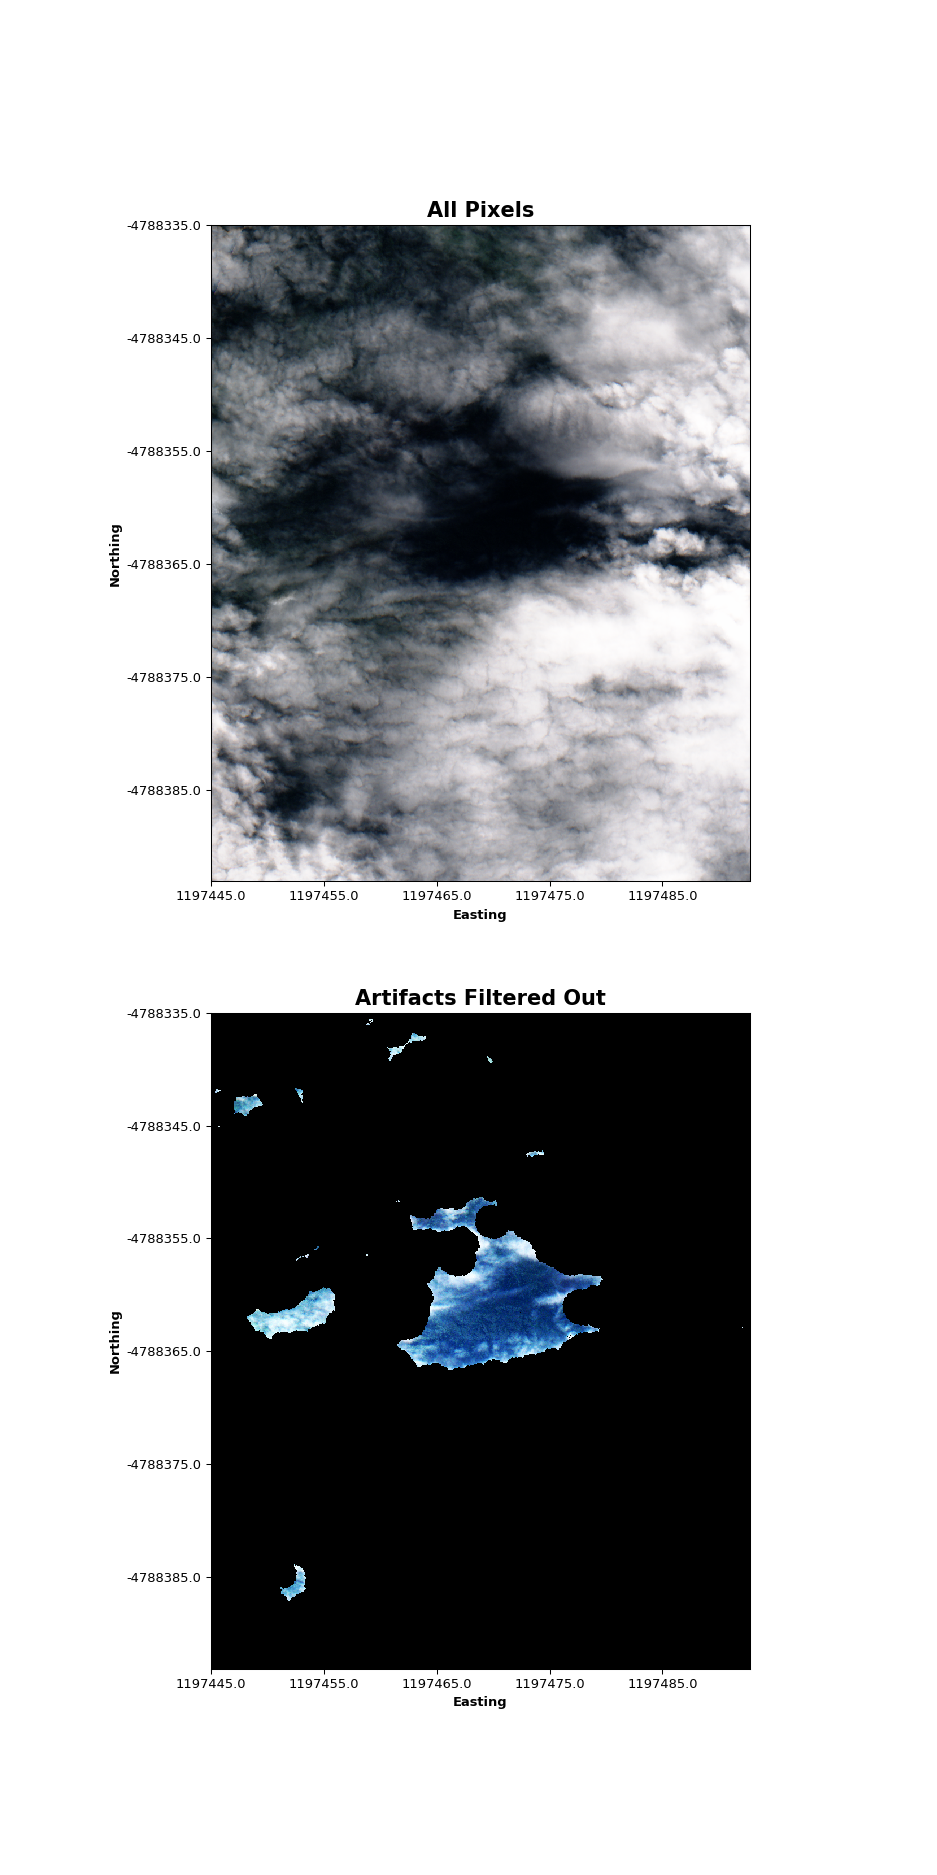

In [81]:
%matplotlib notebook
from utils.utils import three_band_image
import matplotlib.pyplot as plt

#img_toshowNoMask = three_band_image(masked_cloud,bands = ['nbar_red', 'nbar_green', 'nbar_blue'], time = 1)

time = 4
img_toshowNoMask = three_band_image(masked_cloud,bands = ['nbar_red', 'nbar_green', 'nbar_blue'], time = time)
img_toshow = three_band_image(data_cube,bands = ['nbar_red', 'nbar_green', 'nbar_blue'], time = time)
#fig, (ax1, ax2) = plt.subplots(2, 1)
fig = plt.figure(1, [10,20])
fig.canvas.mpl_connect('button_press_event', callback)

plt.subplot(211)
ax = plt.gca()
ax.set_title("All Pixels", fontweight = 'bold', fontsize = 16)
ax.set_xticklabels(data_cube.x.values)
ax.set_yticklabels(data_cube.y.values)
ax.set_xlabel('Easting', fontweight = 'bold')
ax.set_ylabel('Northing', fontweight = 'bold')

plt.imshow(img_toshow)

plt.subplot(212)
ax = plt.gca()
ax.set_title("Artifacts Filtered Out", fontweight = 'bold', fontsize = 16)
ax.set_xticklabels(data_cube.x.values)
ax.set_yticklabels(data_cube.y.values)
ax.set_xlabel('Easting', fontweight = 'bold')
ax.set_ylabel('Northing', fontweight = 'bold')
plt.imshow(img_toshowNoMask)

